<a href="https://colab.research.google.com/github/rnabilahusna/MP_ProductReview/blob/main/amz_review_asterwood_HA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import Library**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

#set warning
import warnings
warnings.filterwarnings('ignore')


pd.pandas.set_option('display.max_columns', None)

In [30]:
file_paths = [
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/Hyaluronic Acid/Data/asterwood-1-stars-HA.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/Hyaluronic Acid/Data/asterwood-2-stars-HA.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/Hyaluronic Acid/Data/asterwood-3-stars-HA.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/Hyaluronic Acid/Data/asterwood-4-stars-HA.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/Hyaluronic Acid/Data/asterwood-5-stars-HA.csv',
]

# Create an empty list to store DataFrames
dataframes = []

# Read each CSV file into a DataFrame and append to the list
for file_path in file_paths:
    d_frame = pd.read_csv(file_path)
    dataframes.append(d_frame)

# Merge all DataFrames into one
df = pd.concat(dataframes, ignore_index=True)

# Display the merged DataFrame
df

,product,date,title,rating,body,helpful_count
0,Amazon.com: Customer reviews: Asterwood Pure H...,15/11/2023,1.0 out of 5 stars\nBreakout like a teenager,1.0,This serum did make my skin look younger in al...,0
1,Amazon.com: Customer reviews: Asterwood Pure H...,30/11/2023,1.0 out of 5 stars\nThe Key Ingredients of thi...,1.0,"When I used these Asterwoold products, I was l...",0
2,Amazon.com: Customer reviews: Asterwood Pure H...,14/10/2023,1.0 out of 5 stars\nSeal broken,1.0,I've been using this product for over a year. ...,4
3,Amazon.com: Customer reviews: Asterwood Pure H...,20/11/2023,1.0 out of 5 stars\nThis serum DID NOTHING for me,1.0,I think this is one of those products that are...,0
4,Amazon.com: Customer reviews: Asterwood Pure H...,11/12/2023,1.0 out of 5 stars\nWeird texture,1.0,It was kinda greasy and left my face feeling o...,0
...,...,...,...,...,...,...
495,Amazon.com: Customer reviews: Asterwood Pure H...,23/06/2023,5.0 out of 5 stars\nGreat product,5.0,I love this serum and use it with their vitami...,2
496,Amazon.com: Customer reviews: Asterwood Pure H...,28/01/2018,5.0 out of 5 stars\nPeople don't know how to u...,5.0,YOU NEED TO APPLY IT TO DAMP/WET SKIN AND PUT ...,985
497,Amazon.com: Customer reviews: Asterwood Pure H...,01/02/2022,5.0 out of 5 stars\nI’ve tried many similar pr...,5.0,I simply love this product. I re-ordered it ab...,9
498,Amazon.com: Customer reviews: Asterwood Pure H...,09/08/2023,5.0 out of 5 stars\nQuality,5.0,Product is amazing. Works,0


In [59]:
df.head()

,product,date,title,rating,body,helpful_count
0,Amazon.com: Customer reviews: Asterwood Pure H...,15/11/2023,1.0 out of 5 stars\nBreakout like a teenager,1.0,This serum did make my skin look younger in al...,0
1,Amazon.com: Customer reviews: Asterwood Pure H...,30/11/2023,1.0 out of 5 stars\nThe Key Ingredients of thi...,1.0,"When I used these Asterwoold products, I was l...",0
2,Amazon.com: Customer reviews: Asterwood Pure H...,14/10/2023,1.0 out of 5 stars\nSeal broken,1.0,I've been using this product for over a year. ...,4
3,Amazon.com: Customer reviews: Asterwood Pure H...,20/11/2023,1.0 out of 5 stars\nThis serum DID NOTHING for me,1.0,I think this is one of those products that are...,0
4,Amazon.com: Customer reviews: Asterwood Pure H...,11/12/2023,1.0 out of 5 stars\nWeird texture,1.0,It was kinda greasy and left my face feeling o...,0


In [60]:
df.tail()

,product,date,title,rating,body,helpful_count
495,Amazon.com: Customer reviews: Asterwood Pure H...,23/06/2023,5.0 out of 5 stars\nGreat product,5.0,I love this serum and use it with their vitami...,2
496,Amazon.com: Customer reviews: Asterwood Pure H...,28/01/2018,5.0 out of 5 stars\nPeople don't know how to u...,5.0,YOU NEED TO APPLY IT TO DAMP/WET SKIN AND PUT ...,985
497,Amazon.com: Customer reviews: Asterwood Pure H...,01/02/2022,5.0 out of 5 stars\nI’ve tried many similar pr...,5.0,I simply love this product. I re-ordered it ab...,9
498,Amazon.com: Customer reviews: Asterwood Pure H...,09/08/2023,5.0 out of 5 stars\nQuality,5.0,Product is amazing. Works,0
499,Amazon.com: Customer reviews: Asterwood Pure H...,23/07/2023,5.0 out of 5 stars\nGood product,5.0,This serum works well. Leaves my skin feeling ...,0


### Dropping unnecessary columns

In [31]:
df.drop(columns = ['product'], inplace = True)
# df.columns = ['Rating', 'Review']
# df.head()

### Rename the columns

In [32]:
df.rename(columns = {'date':'Date',
                     'title':'Title',
                     'rating':'Rating',
                     'body':'Review',
                     'helpful_count':'Helpful Count'},
          inplace = True)

### Get only the summary as the `title`

In [33]:
# Extract sentences after '\n' from the 'Review' column
df['Title'] = df['Title'].apply(lambda x: x.split('\n')[1] if '\n' in x else '')

### Concatenating review text and summary

In [34]:
df['Review']=df['Review']+df['Title']
df=df.drop(['Title'], axis=1)
df.head()

,Date,Rating,Review,Helpful Count
0,15/11/2023,1.0,This serum did make my skin look younger in al...,0
1,30/11/2023,1.0,"When I used these Asterwoold products, I was l...",0
2,14/10/2023,1.0,I've been using this product for over a year. ...,4
3,20/11/2023,1.0,I think this is one of those products that are...,0
4,11/12/2023,1.0,It was kinda greasy and left my face feeling o...,0


###Creating 'sentiment' column

In [35]:
#Figuring out the distribution of categories
df['Rating'].value_counts()

1.0    100
2.0    100
3.0    100
4.0    100
5.0    100
Name: Rating, dtype: int64

In [36]:
# Deciding the outcome column (sentiment of review) based on the overall score.
# If the score is greater than 3, we take that as positive
# If the value is less than 3 it is negative
# If it is equal to 3, we take that as neutral sentiment.

def f(row):
    if row['Rating'] == 3.0:
        val = 'Neutral'
    elif row['Rating'] == 1.0 or row['Rating'] == 2.0:
        val = 'Negative'
    elif row['Rating'] == 4.0 or row['Rating'] == 5.0:
        val = 'Positive'
    else:
        val = -1
    return val

#Applying the function in our new column
df['Sentiment'] = df.apply(f, axis=1)
df.head()

,Date,Rating,Review,Helpful Count,Sentiment
0,15/11/2023,1.0,This serum did make my skin look younger in al...,0,Negative
1,30/11/2023,1.0,"When I used these Asterwoold products, I was l...",0,Negative
2,14/10/2023,1.0,I've been using this product for over a year. ...,4,Negative
3,20/11/2023,1.0,I think this is one of those products that are...,0,Negative
4,11/12/2023,1.0,It was kinda greasy and left my face feeling o...,0,Negative


In [37]:
df['Sentiment'].value_counts()

Negative    200
Positive    200
Neutral     100
Name: Sentiment, dtype: int64



---



#**Preprocessing Data**

## 1.   Data Cleaning



In [13]:
import string
import re

### Removing NaN values and duplicates

In [38]:
# Remove rows that contain empty cells
df.dropna(inplace = True)

# Remove duplicates
df.drop_duplicates(inplace = True)

In [39]:
df.shape

(500, 5)

## 2.   Case Folding

In [40]:
def clean_text(text):
    return re.sub('[^a-zA-Z]', ' ', text).lower()
df['cleaned_text'] = df['Review'].apply(lambda x: clean_text(x))

In [41]:
df['label'] = df['Rating'].map({1:0, 2:0, 3:0, 4:1, 5:1})
df.head(5)

,Date,Rating,Review,Helpful Count,Sentiment,cleaned_text,label
0,15/11/2023,1.0,This serum did make my skin look younger in al...,0,Negative,this serum did make my skin look younger in al...,0
1,30/11/2023,1.0,"When I used these Asterwoold products, I was l...",0,Negative,when i used these asterwoold products i was l...,0
2,14/10/2023,1.0,I've been using this product for over a year. ...,4,Negative,i ve been using this product for over a year ...,0
3,20/11/2023,1.0,I think this is one of those products that are...,0,Negative,i think this is one of those products that are...,0
4,11/12/2023,1.0,It was kinda greasy and left my face feeling o...,0,Negative,it was kinda greasy and left my face feeling o...,0


###Adding additional features

In [46]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

df['review_len'] = df['Review'].apply(lambda x: len(x) - x.count(" "))
df['word_count'] = df['Review'].apply(lambda x: len(str(x).split()))
df['punct'] = df['Review'].apply(lambda x: count_punct(x))

df.head()

,Date,Rating,Review,Helpful Count,Sentiment,cleaned_text,label,polarity,review_len,word_count,punct,tokens
0,15/11/2023,1.0,This serum did make my skin look younger in al...,0,Negative,this serum did make my skin look younger in al...,0,0.8913,999,232,1.8,"[this, serum, did, make, my, skin, look, young..."
1,30/11/2023,1.0,"When I used these Asterwoold products, I was l...",0,Negative,when i used these asterwoold products i was l...,0,0.0000,416,86,3.1,"[when, i, used, these, asterwoold, products, i..."
2,14/10/2023,1.0,I've been using this product for over a year. ...,4,Negative,i ve been using this product for over a year ...,0,-0.8862,369,74,4.1,"[i, ve, been, using, this, product, for, over,..."
3,20/11/2023,1.0,I think this is one of those products that are...,0,Negative,i think this is one of those products that are...,0,0.3818,199,45,2.0,"[i, think, this, is, one, of, those, products,..."
4,11/12/2023,1.0,It was kinda greasy and left my face feeling o...,0,Negative,it was kinda greasy and left my face feeling o...,0,0.1280,53,11,1.9,"[it, was, kinda, greasy, and, left, my, face, ..."


## 3.   Tokenization

In [47]:
def tokenize_text(text):
    tokenized_text = text.split()
    return tokenized_text
df['tokens'] = df['cleaned_text'].apply(lambda x: tokenize_text(x))
df.head()

,Date,Rating,Review,Helpful Count,Sentiment,cleaned_text,label,polarity,review_len,word_count,punct,tokens
0,15/11/2023,1.0,This serum did make my skin look younger in al...,0,Negative,this serum did make my skin look younger in al...,0,0.8913,999,232,1.8,"[this, serum, did, make, my, skin, look, young..."
1,30/11/2023,1.0,"When I used these Asterwoold products, I was l...",0,Negative,when i used these asterwoold products i was l...,0,0.0000,416,86,3.1,"[when, i, used, these, asterwoold, products, i..."
2,14/10/2023,1.0,I've been using this product for over a year. ...,4,Negative,i ve been using this product for over a year ...,0,-0.8862,369,74,4.1,"[i, ve, been, using, this, product, for, over,..."
3,20/11/2023,1.0,I think this is one of those products that are...,0,Negative,i think this is one of those products that are...,0,0.3818,199,45,2.0,"[i, think, this, is, one, of, those, products,..."
4,11/12/2023,1.0,It was kinda greasy and left my face feeling o...,0,Negative,it was kinda greasy and left my face feeling o...,0,0.1280,53,11,1.9,"[it, was, kinda, greasy, and, left, my, face, ..."


## 4.   Stopword Removal

In [21]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import requests

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [48]:
# Download the stopwords file from GitHub
stopwords_url = "https://raw.githubusercontent.com/stopwords-iso/stopwords-en/master/stopwords-en.txt"
response = requests.get(stopwords_url)
stopwords_text = response.text

# Convert the text file into a list of stopwords
custom_stopwords = stopwords_text.splitlines()

# Use NLTK stopwords as a base and add custom stopwords
all_stopwords = set(stopwords.words('english') + custom_stopwords)
all_stopwords.remove('not')  # If you want to keep 'not' in your stopwords

# Now 'all_stopwords' contains NLTK English stopwords plus the custom ones

## 5.   Lemmatization

In [49]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
def lemmatize_text(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

lemmatizer = nltk.stem.WordNetLemmatizer()
df['lemmatized_review'] = df['tokens'].apply(lambda x: lemmatize_text(x))
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Date,Rating,Review,Helpful Count,Sentiment,cleaned_text,label,polarity,review_len,word_count,punct,tokens,lemmatized_review
0,15/11/2023,1.0,This serum did make my skin look younger in al...,0,Negative,this serum did make my skin look younger in al...,0,0.8913,999,232,1.8,"[this, serum, did, make, my, skin, look, young...",serum skin wrong forty created skin care regim...
1,30/11/2023,1.0,"When I used these Asterwoold products, I was l...",0,Negative,when i used these asterwoold products i was l...,0,0.0000,416,86,3.1,"[when, i, used, these, asterwoold, products, i...",asterwoold product left stiff film firm tempor...
2,14/10/2023,1.0,I've been using this product for over a year. ...,4,Negative,i ve been using this product for over a year ...,0,-0.8862,369,74,4.1,"[i, ve, been, using, this, product, for, over,...",product bottle arrived completely sealed seal ...
3,20/11/2023,1.0,I think this is one of those products that are...,0,Negative,i think this is one of those products that are...,0,0.3818,199,45,2.0,"[i, think, this, is, one, of, those, products,...",product promoted amazon company push hype abso...
4,11/12/2023,1.0,It was kinda greasy and left my face feeling o...,0,Negative,it was kinda greasy and left my face feeling o...,0,0.1280,53,11,1.9,"[it, was, kinda, greasy, and, left, my, face, ...",kinda greasy left feeling oily weird texture


In [50]:
df.shape

(500, 13)

### Handling time column

In [51]:
# Split the 'Date' column into day, month, and year
df[['Day', 'Month', 'Year']] = df['Date'].str.split('/', expand=True)

df=df.drop(['Date'], axis=1)
df.head()

,Rating,Review,Helpful Count,Sentiment,cleaned_text,label,polarity,review_len,word_count,punct,tokens,lemmatized_review,Day,Month,Year
0,1.0,This serum did make my skin look younger in al...,0,Negative,this serum did make my skin look younger in al...,0,0.8913,999,232,1.8,"[this, serum, did, make, my, skin, look, young...",serum skin wrong forty created skin care regim...,15,11,2023
1,1.0,"When I used these Asterwoold products, I was l...",0,Negative,when i used these asterwoold products i was l...,0,0.0000,416,86,3.1,"[when, i, used, these, asterwoold, products, i...",asterwoold product left stiff film firm tempor...,30,11,2023
2,1.0,I've been using this product for over a year. ...,4,Negative,i ve been using this product for over a year ...,0,-0.8862,369,74,4.1,"[i, ve, been, using, this, product, for, over,...",product bottle arrived completely sealed seal ...,14,10,2023
3,1.0,I think this is one of those products that are...,0,Negative,i think this is one of those products that are...,0,0.3818,199,45,2.0,"[i, think, this, is, one, of, those, products,...",product promoted amazon company push hype abso...,20,11,2023
4,1.0,It was kinda greasy and left my face feeling o...,0,Negative,it was kinda greasy and left my face feeling o...,0,0.1280,53,11,1.9,"[it, was, kinda, greasy, and, left, my, face, ...",kinda greasy left feeling oily weird texture,11,12,2023




---



## **Sentiment Analysis**

### Using NLTK

In [61]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

# Function to get sentiment polarity from a text using NLTK
def get_sentiment_nltk(text):
    sid = SentimentIntensityAnalyzer()
    compound_score = sid.polarity_scores(str(text))['compound']
    return compound_score

# Apply sentiment analysis to the 'body' column using NLTK
df['sentiment_nltk'] = df['Review'].apply(get_sentiment_nltk)

### Using TextBlob

In [67]:
from textblob import TextBlob

# Function to get sentiment polarity from a text
def get_sentiment(text):
    analysis = TextBlob(str(text))
    return analysis.sentiment.polarity

# Apply sentiment analysis to the 'body' column
df['sentiment_tb'] = df['Review'].apply(get_sentiment)

In [69]:
df[['sentiment_nltk','sentiment_tb']]

,sentiment_nltk,sentiment_tb
0,0.8913,-0.093676
1,0.0000,0.020952
2,-0.8862,-0.014876
3,0.3818,0.200000
4,0.1280,0.000000
...,...,...
495,0.8772,0.372222
496,0.9824,0.264583
497,0.9704,0.137767
498,0.5859,0.600000




---



#**EDA**

## **Sentiment Distribution Over Years**

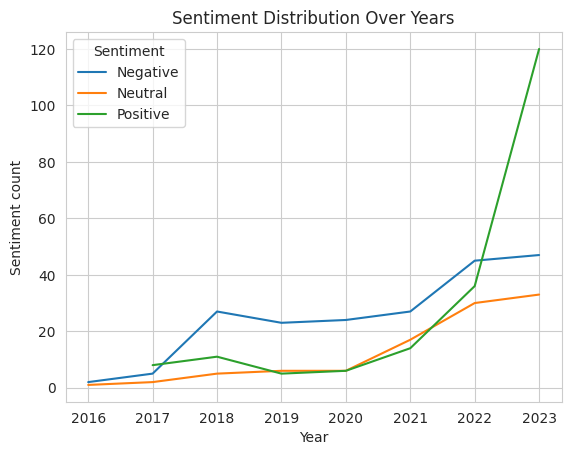

In [70]:
df.groupby(['Year','Sentiment'])['Sentiment'].count().unstack().plot(legend=True)
plt.title('Sentiment Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Sentiment count')
plt.show()

From the plot, it shown that the of positive reviews from 2020. Though there was a small dip in 2019 and 2020, however it starts to reach its peak around 2023 starting froom 2020.


## **Reviews Count Across Days of the Month**

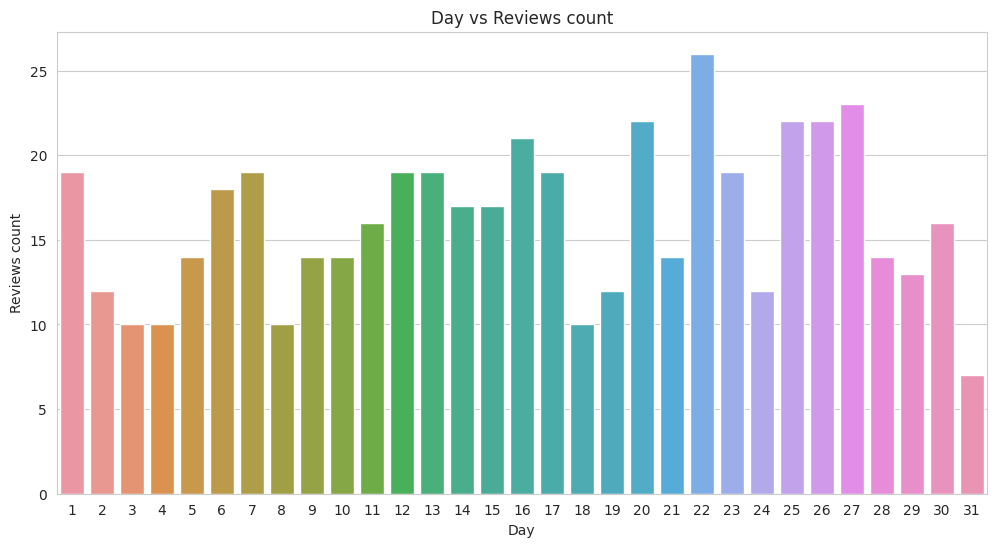

In [53]:
#Creating a dataframe
day=pd.DataFrame(df.groupby('Day')['Review'].count()).reset_index()
day['Day']=day['Day'].astype('int64')
day.sort_values(by=['Day'])

#Plotting the graph
plt.figure(figsize=(12, 6))
sns.barplot(x="Day", y="Review", data=day)
plt.title('Day vs Reviews count')
plt.xlabel('Day')
plt.ylabel('Reviews count')
plt.show()

Insights:



##**Sentiment polarity distribution**

### NLTK

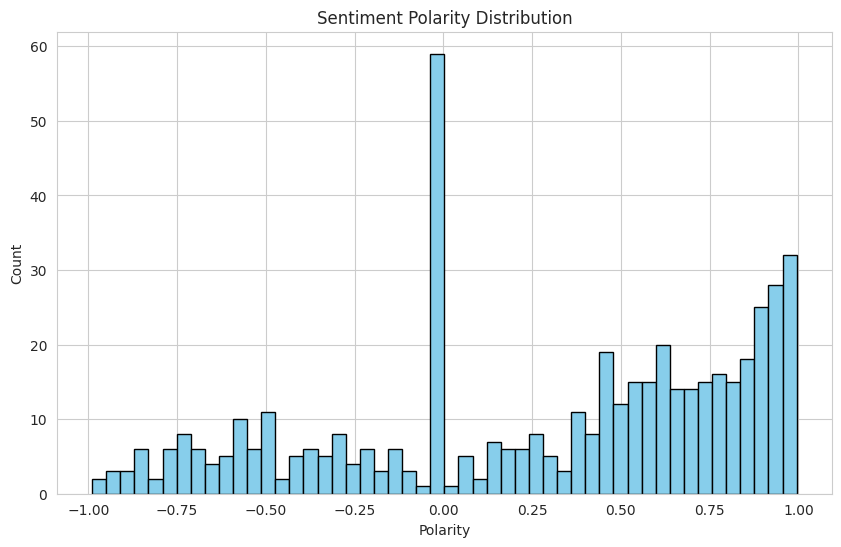

In [56]:
plt.figure(figsize=(10, 6))
plt.hist(df['polarity'], bins=50, color='skyblue', edgecolor='black')
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.show()

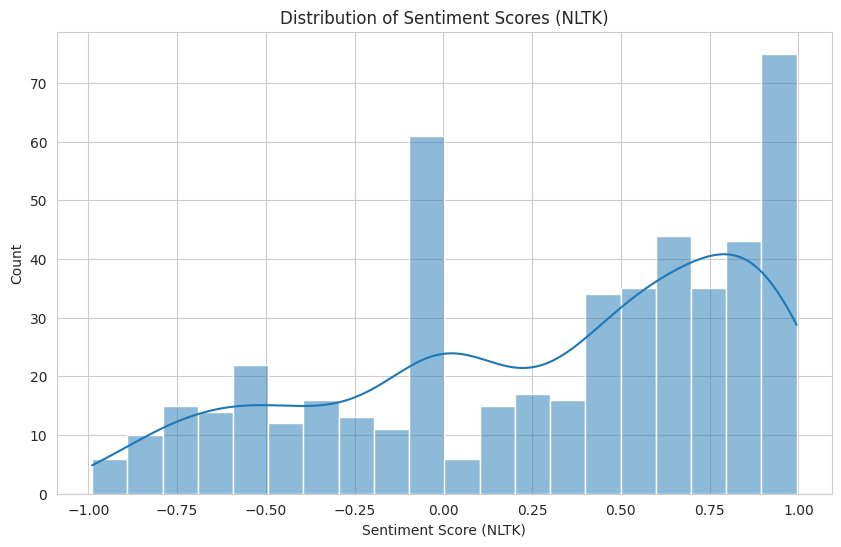

In [63]:
# Distribution of sentiment scores using NLTK
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment_nltk'], bins=20, kde=True)
plt.title('Distribution of Sentiment Scores (NLTK)')
plt.xlabel('Sentiment Score (NLTK)')
plt.show()

### TextBlob

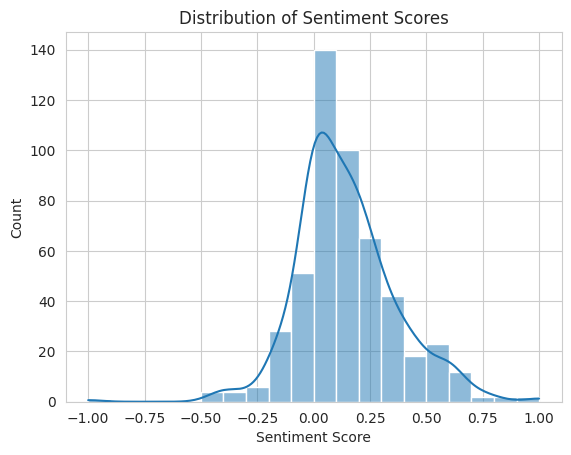

In [66]:
# Distribution of sentiment scores
sns.histplot(df['sentiment_tb'], bins=20, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.show()

## **Sentiment Distributions**

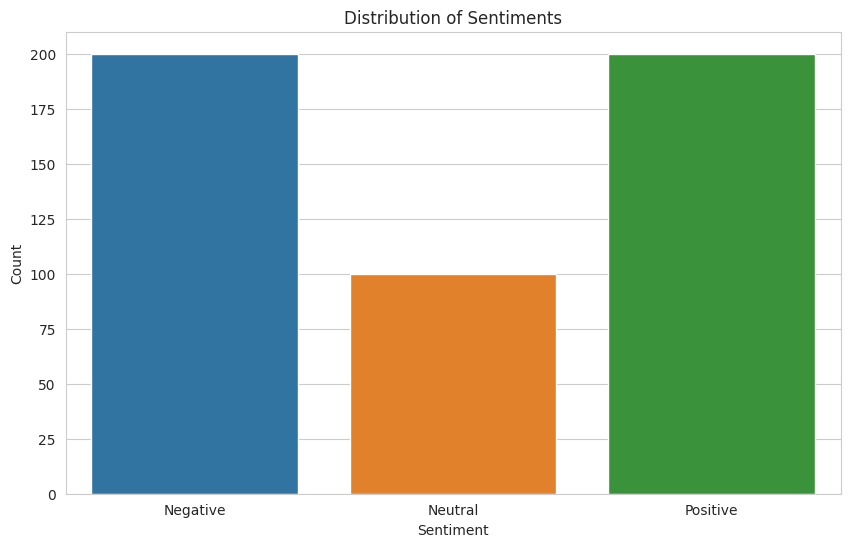

In [74]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


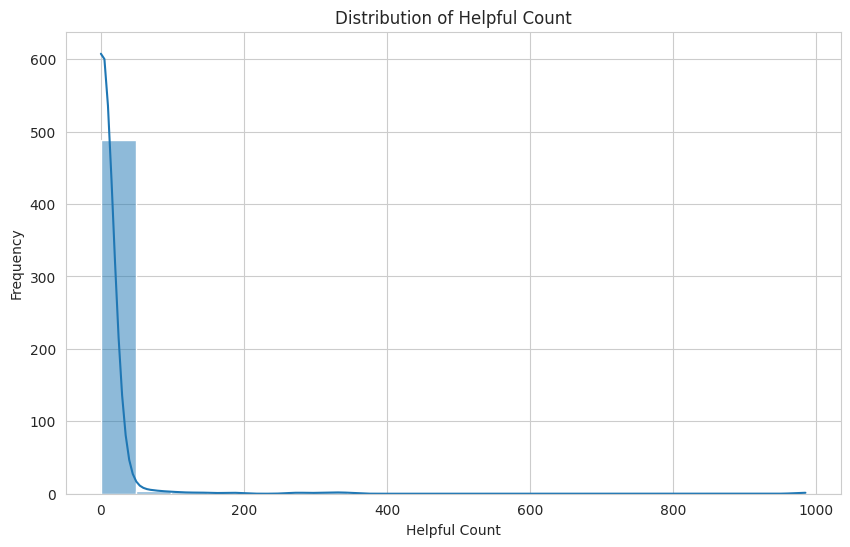

In [76]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Helpful Count'], bins=20, kde=True)
plt.title('Distribution of Helpful Count')
plt.xlabel('Helpful Count')
plt.ylabel('Frequency')
plt.show()

## **Average Helpful Count Across Different Sentiments**

In [79]:
df['Helpful Count'].value_counts()

0      295
2       60
3       33
4       25
7        8
5        8
9        8
10       6
12       5
6        5
8        5
11       4
17       4
24       2
32       2
15       2
19       2
28       2
14       2
91       1
43       1
30       1
141      1
29       1
58       1
69       1
314      1
20       1
183      1
25       1
44       1
18       1
75       1
340      1
33       1
110      1
45       1
22       1
13       1
275      1
985      1
Name: Helpful Count, dtype: int64

In [80]:
pd.DataFrame(df.groupby('Sentiment')['Helpful Count'].mean())

,Helpful Count
Sentiment,
Negative,5.745
Neutral,5.090
Positive,11.790


From the table above we can see that the reviews with positive sentiment tend to receive higher 'Helpful Count' compared to reviews with negative or neutral sentiments.

* The higher average 'Helpful Count' for positive sentiment reviews suggests that users are more inclined to find positive reviews helpful. Positive reviews may contain information that users find valuable or reassuring, leading to a higher likelihood of receiving helpful votes.

* Reviews with negative or neutral sentiments, on average, receive fewer helpful votes, which might indicate that users find positive reviews more informative or beneficial.

In [81]:
#Shape of the dataset, and breakdown of the classes

print(f"Input data has {len(df)} rows and {len(df.columns)} columns")
print(f"rating 1.0 = {len(df[df['Rating']==1.0])} rows")
print(f"rating 2.0 = {len(df[df['Rating']==2.0])} rows")
print(f"rating 3.0 = {len(df[df['Rating']==3.0])} rows")
print(f"rating 4.0 = {len(df[df['Rating']==4.0])} rows")
print(f"rating 5.0 = {len(df[df['Rating']==5.0])} rows")

Input data has 500 rows and 14 columns
rating 1.0 = 100 rows
rating 2.0 = 100 rows
rating 3.0 = 100 rows
rating 4.0 = 100 rows
rating 5.0 = 100 rows


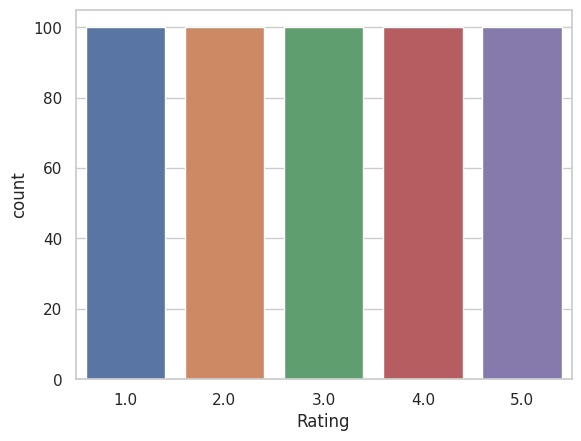

In [82]:
# Plotting the rate for each rating

sns.countplot(x='Rating', data=df);

#**Word Frequency Visualization using Word Cloud**

In [78]:
from wordcloud import WordCloud

In [79]:
df_negative = df[ (df['Rating']==1.0) | (df['Rating']==2.0) | (df['Rating']==3.0)]
df_positive = df[ (df['Rating']==4.0) | (df['Rating']==5.0)]

# Converting to list
negative_list=df_negative['lemmatized_review'].tolist()
positive_list= df_positive['lemmatized_review'].tolist()
# negative_list=df_negative['stemmed_review'].tolist()
# positive_list= df_positive['stemmed_review'].tolist()

filtered_negative = ("").join(str(negative_list)) #convert the list into a string of spam
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list)) #convert the list into a string of ham
filtered_positive = filtered_positive.lower()

##**Word Cloud:** Positive Reviews

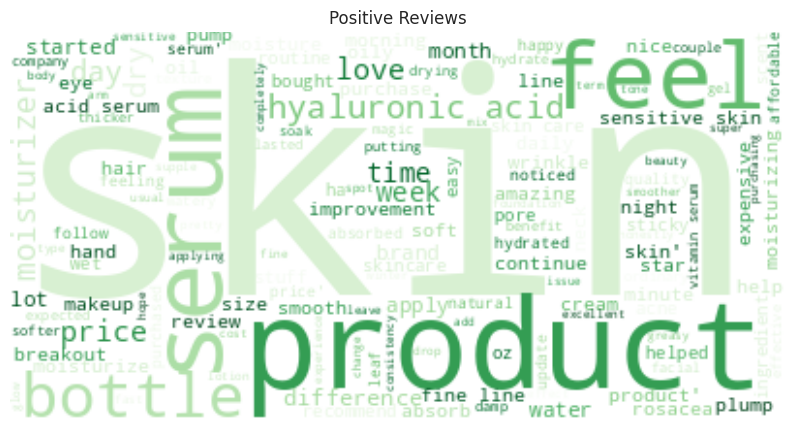

In [80]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_positive)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Reviews")
plt.show()

##**Word Cloud:** Negative Reviews

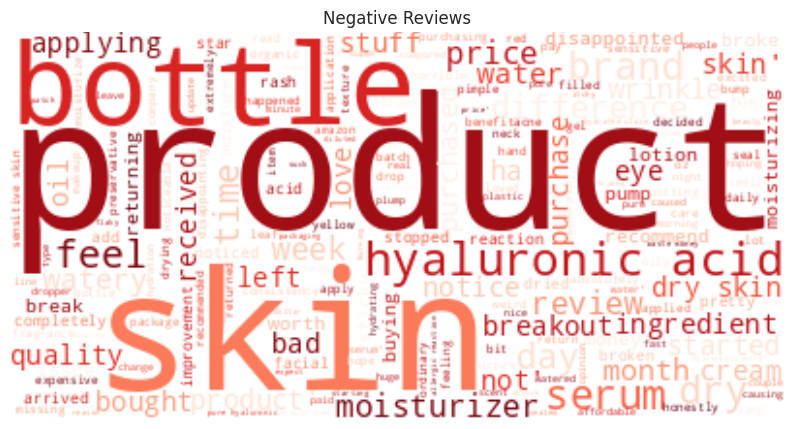

In [81]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Reviews")
plt.show()



---



#**Feature Extraction from Text**



*   TF-IDF Vectorizer



In [ ]:
X = df[['lemmatized_review', 'Review_len', 'punct']]
y = df['label']
print(X.shape)
print(y.shape)

(295, 3)
(295,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(206, 3)
(89, 3)
(206,)
(89,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df = 0.5, min_df = 2) # ignore terms that occur in more than 50% documents and the ones that occur in less than 2
tfidf_train = tfidf.fit_transform(X_train['lemmatized_review'])
tfidf_test = tfidf.transform(X_test['lemmatized_review'])

X_train_vect = pd.concat([X_train[['Review_len', 'punct']].reset_index(drop=True),
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['Review_len', 'punct']].reset_index(drop=True),
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,Review_len,punct,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362
0,289,1.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.228916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.268288,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.257931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.297303,0.0,0.0,0.0,0.0,0.0,0.561925,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.186773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.139817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.257931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.198548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.249176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.268288,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.332404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0



---



---



#**Model Development**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##Multinomial Naive Bayes (MNB)

              precision    recall  f1-score   support

           0       0.63      0.60      0.62        40
           1       0.69      0.71      0.70        49

    accuracy                           0.66        89
   macro avg       0.66      0.66      0.66        89
weighted avg       0.66      0.66      0.66        89



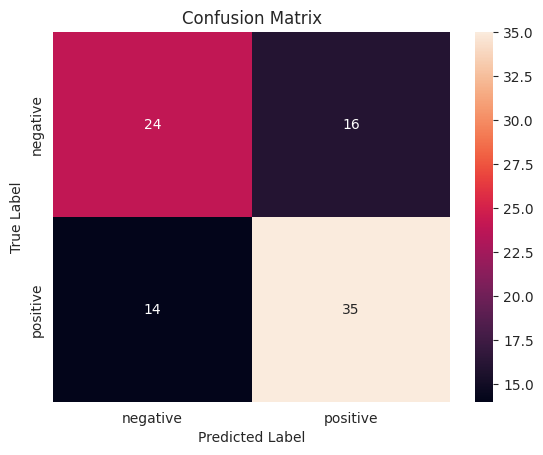

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Assuming X_train_vect and X_test_vect are already defined

# Convert all column names to strings for both training and testing sets
X_train_vect.columns = X_train_vect.columns.astype(str)
X_test_vect.columns = X_test_vect.columns.astype(str)

# Create and fit the classifier
classifier = MultinomialNB()
classifier.fit(X_train_vect, y_train)

# Perform predictions
naive_bayes_pred = classifier.predict(X_test_vect)

# Classification Report
print(classification_report(y_test, naive_bayes_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


#**Confusion Matrix Visualization**



*   TF-IDF Vectorizer



##Multinomial Naive Bayes (MNB)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

              precision    recall  f1-score   support

           0       0.63      0.60      0.62        40
           1       0.69      0.71      0.70        49

    accuracy                           0.66        89
   macro avg       0.66      0.66      0.66        89
weighted avg       0.66      0.66      0.66        89



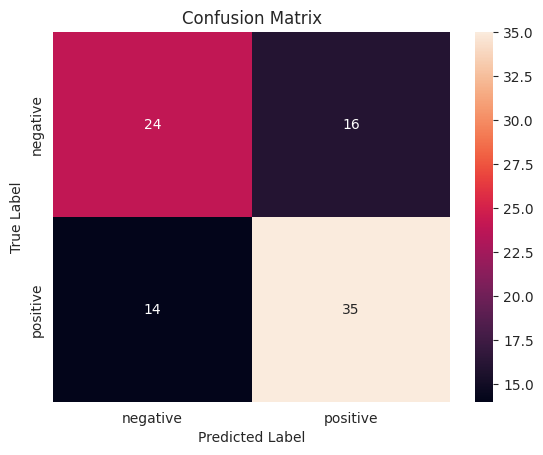

In [ ]:
# Classification Report
print(classification_report(y_test, naive_bayes_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

##Logistic Regression


              precision    recall  f1-score   support

           0       0.61      0.82      0.70        40
           1       0.80      0.57      0.67        49

    accuracy                           0.69        89
   macro avg       0.71      0.70      0.68        89
weighted avg       0.72      0.69      0.68        89



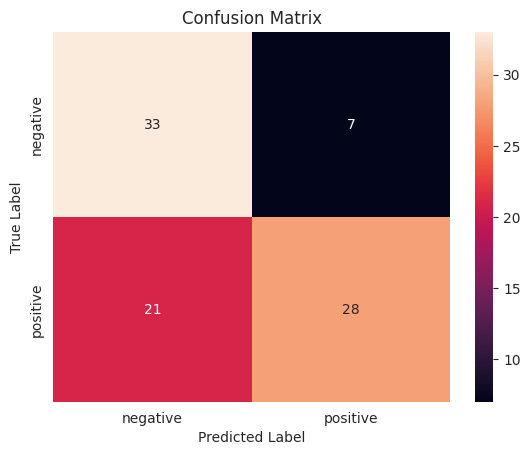

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_vect, y_train)
log_reg_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, log_reg_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, log_reg_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

##Random Forest

              precision    recall  f1-score   support

           0       0.61      0.90      0.73        40
           1       0.87      0.53      0.66        49

    accuracy                           0.70        89
   macro avg       0.74      0.72      0.69        89
weighted avg       0.75      0.70      0.69        89



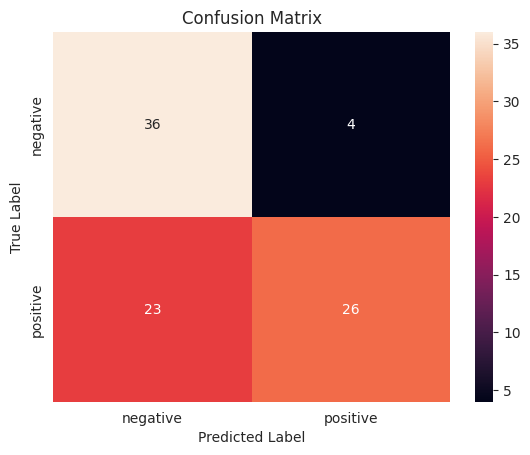

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=150)
classifier.fit(X_train_vect, y_train)
random_forest_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, random_forest_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, random_forest_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


##Support Vector Machine (SVM)


              precision    recall  f1-score   support

           0       0.63      0.78      0.70        40
           1       0.78      0.63      0.70        49

    accuracy                           0.70        89
   macro avg       0.70      0.70      0.70        89
weighted avg       0.71      0.70      0.70        89



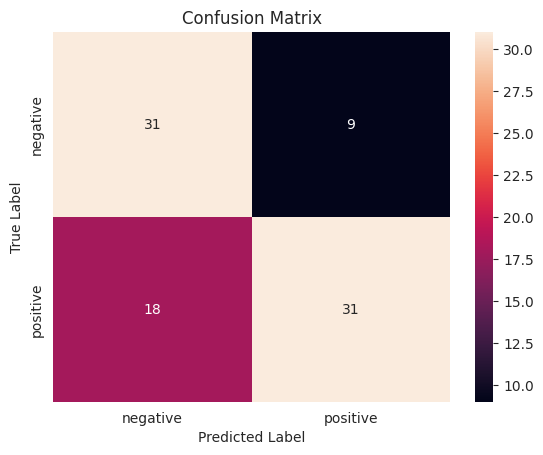

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_vect, y_train)
svm_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, svm_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, svm_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

##K-Nearest Neighbor (KNN)

              precision    recall  f1-score   support

           0       0.44      0.68      0.53        40
           1       0.52      0.29      0.37        49

    accuracy                           0.46        89
   macro avg       0.48      0.48      0.45        89
weighted avg       0.48      0.46      0.44        89



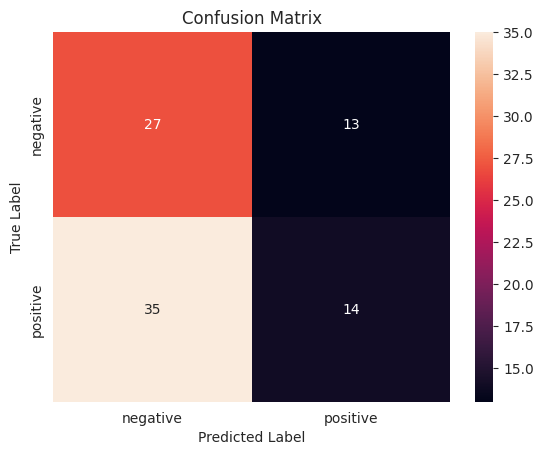

In [ ]:
# Classification report
print(classification_report(y_test, knn_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, knn_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

##Extra Trees Classifier


              precision    recall  f1-score   support

           0       0.59      0.80      0.68        40
           1       0.77      0.55      0.64        49

    accuracy                           0.66        89
   macro avg       0.68      0.68      0.66        89
weighted avg       0.69      0.66      0.66        89



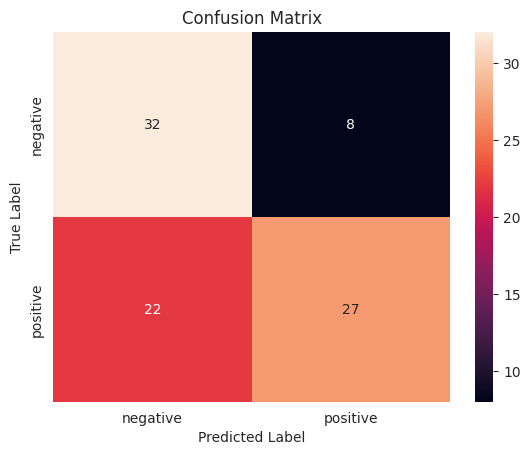

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier(n_estimators=150, random_state=50)
classifier.fit(X_train_vect, y_train)
extra_trees_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, extra_trees_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, extra_trees_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()




---



#**K-Fold Cross Validation**

Comparing both ML techniques' by classification metrics.

In [ ]:
from sklearn.model_selection import cross_val_score

models = [
          MultinomialNB(),
          LogisticRegression(),
          RandomForestClassifier(n_estimators = 150),
          SVC(kernel = 'linear'),
          KNeighborsClassifier(n_neighbors = 5),
          ExtraTreesClassifier(n_estimators=150, random_state=50)
         ]
names = ["Naive Bayes", "Logistic Regression", "Random Forest", "SVM", "KNN", "Extra Trees"]
for model, name in zip(models, names):
    print(name)
    for score in ["accuracy", "precision", "recall", "f1"]:
        print(f" {score} - {cross_val_score(model, X_train_vect, y_train, scoring=score, cv=10).mean()} ")
    print()

Naive Bayes
 accuracy - 0.5916666666666667 
 precision - 0.59498556998557 
 recall - 0.6166666666666667 
 f1 - 0.5920804151353349 

Logistic Regression
 accuracy - 0.7240476190476189 
 precision - 0.7607142857142857 
 recall - 0.5955555555555556 
 f1 - 0.6661807705538355 

Random Forest
 accuracy - 0.647142857142857 
 precision - 0.6638095238095237 
 recall - 0.43666666666666665 
 f1 - 0.5637116641528406 

SVM
 accuracy - 0.7185714285714286 
 precision - 0.7367063492063493 
 recall - 0.6144444444444443 
 f1 - 0.6640720674234606 

KNN
 accuracy - 0.5288095238095238 
 precision - 0.5266666666666666 
 recall - 0.4488888888888889 
 f1 - 0.4722507471888277 

Extra Trees
 accuracy - 0.7095238095238094 
 precision - 0.7466269841269841 
 recall - 0.5844444444444444 
 f1 - 0.6529016167870656 



#**Predictions Testing**


*   TF-IDF Vectorizer




*   Support Vector Machine (SVM)



In [ ]:
from sklearn.svm import SVC
SVM_classifier = SVC(kernel = 'linear', random_state = 10)

SVM_classifier.fit(tfidf_train, y_train)
SVM_classifier.score(tfidf_test, y_test)

0.6966292134831461

In [ ]:
data = ["Bad", "Love it", "I hate the product, it's really bad", "It feels so smooth on my skin"]
vect = tfidf.transform(data).toarray()

my_pred = SVM_classifier.predict(vect)
print(my_pred)

[0 1 0 1]




*   KNN



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (n_neighbors) as needed

# Fit the classifier to the training data
knn_classifier.fit(tfidf_train, y_train)
accuracy = knn_classifier.score(tfidf_test, y_test)
print(f"Accuracy: {accuracy}")


Accuracy: 0.449438202247191


In [ ]:
new_data = ["Bad", "Love it", "I hate the product, it's really bad", "Feels tingle on my skin"]
vect = tfidf.transform(new_data).toarray()

my_pred = knn_classifier.predict(vect)
print(my_pred)

[0 1 0 0]




*   Random Forest



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators (n_estimators) as needed

# Fit the classifier to the training data
rf_classifier.fit(tfidf_train, y_train)

# Calculate and print the accuracy
accuracy = rf_classifier.score(tfidf_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7078651685393258


In [ ]:
newest_data = ["Bad", "I like it", "I hate the product, it's really bad", "It feels so smooth on my skin"]
vect_rf = tfidf.transform(newest_data).toarray()

my_pred_rf = rf_classifier.predict(vect_rf)
print(my_pred_rf)

[0 0 0 1]
